<a href="https://colab.research.google.com/github/rajiv-m16/Akasa-Data-Analytics-Task/blob/main/akasa_aviation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Interview Task - Data engineering and analytics

AKASA AIR

**Name: Rajiv Mahato**
**Roll No.: 232010032**

# Data Cleaning

**Importing necessary libraries**

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sqlite3

%matplotlib inline
%reload_ext autoreload
%autoreload 2

*** Steps in data cleaning ***


1.   Find null and nan values
2.   Change all values to integer, string or datatime dtype
3.   Find dublicate data and anamolies
4.  correct arrival time
5.  Analyse data by various columns




In [7]:

df = pd.read_csv(r"/content/aviation.csv")


print(df.head())


  FlightNumber DepartureDate DepartureTime ArrivalDate ArrivalTime  \
0       AA1234    09/01/2023      08:30 AM  09/01/2023    10:45 AM   
1       DL5678    09/01/2023      01:15 PM  09/01/2023    03:30 PM   
2       UA9101    09/01/2023      05:00 PM  09/01/2023    07:15 PM   
3       AA1234    09/01/2023      08:30 AM  09/01/2023    10:45 PM   
4       DL5678    09/02/2023      02:00 PM  09/02/2023    04:10 PM   

             Airline  DelayMinutes  
0  American Airlines          15.0  
1              Delta           5.0  
2    United Airlines          25.0  
3  American Airlines          30.0  
4              Delta           NaN  


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FlightNumber   12 non-null     object 
 1   DepartureDate  12 non-null     object 
 2   DepartureTime  12 non-null     object 
 3   ArrivalDate    12 non-null     object 
 4   ArrivalTime    12 non-null     object 
 5   Airline        12 non-null     object 
 6   DelayMinutes   10 non-null     float64
dtypes: float64(1), object(6)
memory usage: 800.0+ bytes


**Finding nan values**

In [9]:
nan_values = df.isna()
print(nan_values)

    FlightNumber  DepartureDate  DepartureTime  ArrivalDate  ArrivalTime  \
0          False          False          False        False        False   
1          False          False          False        False        False   
2          False          False          False        False        False   
3          False          False          False        False        False   
4          False          False          False        False        False   
5          False          False          False        False        False   
6          False          False          False        False        False   
7          False          False          False        False        False   
8          False          False          False        False        False   
9          False          False          False        False        False   
10         False          False          False        False        False   
11         False          False          False        False        False   

    Airline

**Replacing nan values with median values in delayminutes column**

In [10]:
df['DelayMinutes'].fillna(df['DelayMinutes'].mean(),inplace = True)
df.head()

,FlightNumber,DepartureDate,DepartureTime,ArrivalDate,ArrivalTime,Airline,DelayMinutes
0,AA1234,09/01/2023,08:30 AM,09/01/2023,10:45 AM,American Airlines,15.0
1,DL5678,09/01/2023,01:15 PM,09/01/2023,03:30 PM,Delta,5.0
2,UA9101,09/01/2023,05:00 PM,09/01/2023,07:15 PM,United Airlines,25.0
3,AA1234,09/01/2023,08:30 AM,09/01/2023,10:45 PM,American Airlines,30.0
4,DL5678,09/02/2023,02:00 PM,09/02/2023,04:10 PM,Delta,25.0



> Nan values rows can be dealt in 2 ways:
1. deleting nan values containing rows
2. filling nan values with mean, median or mode of the respective columns.
Here, i used second option as deleting 2 rows in a small dataset can severly impact results of the analysis.



In [11]:
# creating a copy of df
df_copy = df.copy()


**Checking for dublicates**

In [12]:
duplicates  = df[df.duplicated(subset=['FlightNumber','DepartureDate','DepartureTime'])]


duplicates


,FlightNumber,DepartureDate,DepartureTime,ArrivalDate,ArrivalTime,Airline,DelayMinutes
3,AA1234,09/01/2023,08:30 AM,09/01/2023,10:45 PM,American Airlines,30.0


**Removing the dublicate row which is row with index 3**

In [13]:
df.drop(3, inplace = True)


# Reseting the index after dropping the row


df.reset_index(drop=True, inplace=True)


**Converting time to 24 hour format**

In [14]:
# converting values dtypes into datetime format and changing format to 24 hours

df['DepartureTime'] = pd.to_datetime(df['DepartureTime'],format = '%I:%M %p').dt.time
df['ArrivalTime'] = pd.to_datetime(df['ArrivalTime'],format = '%I:%M %p').dt.time




**Changing date format from mm-dd-yyyy to yyyy-mm-dd**

In [15]:
# converting values dtypes into datetime format
df['DepartureDate'] = pd.to_datetime(df['DepartureDate'], format='%m/%d/%Y')
df['ArrivalDate'] = pd.to_datetime(df['ArrivalDate'], format='%m/%d/%Y')



In [16]:
df

,FlightNumber,DepartureDate,DepartureTime,ArrivalDate,ArrivalTime,Airline,DelayMinutes
0,AA1234,2023-09-01,08:30:00,2023-09-01,10:45:00,American Airlines,15.0
1,DL5678,2023-09-01,13:15:00,2023-09-01,15:30:00,Delta,5.0
2,UA9101,2023-09-01,17:00:00,2023-09-01,19:15:00,United Airlines,25.0
3,DL5678,2023-09-02,14:00:00,2023-09-02,16:10:00,Delta,25.0
4,UA9101,2023-09-02,17:00:00,2023-09-02,19:15:00,United Airlines,20.0
5,AA1234,2023-09-02,20:30:00,2023-09-03,10:45:00,American Airlines,60.0
6,DL5678,2023-09-03,13:00:00,2023-09-03,15:30:00,Delta,10.0
7,UA9101,2023-09-03,15:00:00,2023-09-03,17:20:00,United Airlines,25.0
8,AA1234,2023-09-03,08:30:00,2023-09-03,10:00:00,American Airlines,15.0
9,DL5678,2023-09-04,12:30:00,2023-09-04,14:40:00,Delta,25.0


In [17]:
# Combine date and time into datetime
df['DepartureDateTime'] = df['DepartureDate'].astype(str) + ' ' + df['DepartureTime'].astype(str)
df['ArrivalDateTime'] = df['ArrivalDate'].astype(str) + ' ' + df['ArrivalTime'].astype(str)


# Converting new columns to datetime dtype
df['DepartureDateTime'] = pd.to_datetime(df['DepartureDateTime'])
df['ArrivalDateTime'] = pd.to_datetime(df['ArrivalDateTime'])

#Calculating flight duration in minutes

df['FlightDuration'] = (df['ArrivalDateTime'] - df['DepartureDateTime']).dt.total_seconds() / 60


# dropping intermediate newly created columns
df = df.drop(columns=['DepartureDateTime','ArrivalDateTime'])
print(df)


   FlightNumber DepartureDate DepartureTime ArrivalDate ArrivalTime  \
0        AA1234    2023-09-01      08:30:00  2023-09-01    10:45:00   
1        DL5678    2023-09-01      13:15:00  2023-09-01    15:30:00   
2        UA9101    2023-09-01      17:00:00  2023-09-01    19:15:00   
3        DL5678    2023-09-02      14:00:00  2023-09-02    16:10:00   
4        UA9101    2023-09-02      17:00:00  2023-09-02    19:15:00   
5        AA1234    2023-09-02      20:30:00  2023-09-03    10:45:00   
6        DL5678    2023-09-03      13:00:00  2023-09-03    15:30:00   
7        UA9101    2023-09-03      15:00:00  2023-09-03    17:20:00   
8        AA1234    2023-09-03      08:30:00  2023-09-03    10:00:00   
9        DL5678    2023-09-04      12:30:00  2023-09-04    14:40:00   
10       UA9101    2023-09-04      19:00:00  2023-09-04    21:15:00   

              Airline  DelayMinutes  FlightDuration  
0   American Airlines          15.0           135.0  
1               Delta           5.0    

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   FlightNumber    11 non-null     object        
 1   DepartureDate   11 non-null     datetime64[ns]
 2   DepartureTime   11 non-null     object        
 3   ArrivalDate     11 non-null     datetime64[ns]
 4   ArrivalTime     11 non-null     object        
 5   Airline         11 non-null     object        
 6   DelayMinutes    11 non-null     float64       
 7   FlightDuration  11 non-null     float64       
 8   DepartureHour   11 non-null     int32         
dtypes: datetime64[ns](2), float64(2), int32(1), object(4)
memory usage: 876.0+ bytes


In [51]:
# Saving the cleaned and normalized csv file


df.to_csv('cleaned_normalized_data.csv', index=False)


### Storing the cleaned data into the database

In [56]:

# Connect to the SQLite database
conn = sqlite3.connect('aviation.db')
cursor = conn.cursor()


In [57]:
# Define the schema
create_table_query = '''
CREATE TABLE IF NOT EXISTS flights (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    flight_number TEXT,
    departure_date DATE,
    departure_time TEXT,
    arrival_date DATE,
    arrival_time TEXT,
    airline TEXT,
    delay_minutes REAL,
    flight_duration REAL
);
'''

# Execute the query to create the table
cursor.execute(create_table_query)


In [63]:
# Convert data types for SQLite compatibility

df['DepartureDate'] = pd.to_datetime(df['DepartureDate']).dt.strftime('%Y-%m-%d')
df['DepartureTime'] = pd.to_datetime(df['DepartureTime'], format='%H:%M:%S', errors='coerce').dt.strftime('%H:%M:%S')
df['ArrivalDate'] = pd.to_datetime(df['ArrivalDate']).dt.strftime('%Y-%m-%d')
df['ArrivalTime'] = pd.to_datetime(df['ArrivalTime'], format='%H:%M:%S', errors='coerce').dt.strftime('%H:%M:%S')
df['DelayMinutes'] = df['DelayMinutes'].astype(float)
df['FlightDuration'] = df['FlightDuration'].astype(float)


In [64]:
# Insert data into the database
insert_query = '''
INSERT INTO flights (flight_number, departure_date, departure_time, arrival_date, arrival_time, airline, delay_minutes, flight_duration)
VALUES (?, ?, ?, ?, ?, ?, ?, ?)
'''

for _, row in df.iterrows():
    try:
        cursor.execute(insert_query, (
            row['FlightNumber'],
            row['DepartureDate'],
            row['DepartureTime'],
            row['ArrivalDate'],
            row['ArrivalTime'],
            row['Airline'],
            row['DelayMinutes'],
            row['FlightDuration']
        ))
    except Exception as e:
        print(f"Error inserting row: {e}")
        print(row)

# Commit and close
conn.commit()
conn.close()

## Viewing the data in the database

In [67]:
conn = sqlite3.connect('aviation.db')

cursor = conn.cursor()

# Query data
cursor.execute('SELECT * FROM flights')
rows = cursor.fetchall()

# Print data
for row in rows:
    print(row)

# Close connection
conn.close()



(1, 'AA1234', '2023-09-01', '08:30:00', '2023-09-01', '10:45:00', 'American Airlines', 15.0, 135.0)
(2, 'DL5678', '2023-09-01', '13:15:00', '2023-09-01', '15:30:00', 'Delta', 5.0, 135.0)
(3, 'UA9101', '2023-09-01', '17:00:00', '2023-09-01', '19:15:00', 'United Airlines', 25.0, 135.0)
(4, 'DL5678', '2023-09-02', '14:00:00', '2023-09-02', '16:10:00', 'Delta', 25.0, 130.0)
(5, 'UA9101', '2023-09-02', '17:00:00', '2023-09-02', '19:15:00', 'United Airlines', 20.0, 135.0)
(6, 'AA1234', '2023-09-02', '20:30:00', '2023-09-03', '10:45:00', 'American Airlines', 60.0, 855.0)
(7, 'DL5678', '2023-09-03', '13:00:00', '2023-09-03', '15:30:00', 'Delta', 10.0, 150.0)
(8, 'UA9101', '2023-09-03', '15:00:00', '2023-09-03', '17:20:00', 'United Airlines', 25.0, 140.0)
(9, 'AA1234', '2023-09-03', '08:30:00', '2023-09-03', '10:00:00', 'American Airlines', 15.0, 90.0)
(10, 'DL5678', '2023-09-04', '12:30:00', '2023-09-04', '14:40:00', 'Delta', 25.0, 130.0)
(11, 'UA9101', '2023-09-04', '19:00:00', '2023-09-04', 

# Exploratory Data Analysis

In [20]:
df.columns

Index(['FlightNumber', 'DepartureDate', 'DepartureTime', 'ArrivalDate',
       'ArrivalTime', 'Airline', 'DelayMinutes', 'FlightDuration'],
      dtype='object')

### Distribution of delays

In [21]:
# Summary statistics for DelayMinutes

delay_stats = df['DelayMinutes'].describe()
delay_stats


count    11.000000
mean     24.545455
std      15.724908
min       5.000000
25%      15.000000
50%      25.000000
75%      25.000000
max      60.000000
Name: DelayMinutes, dtype: float64




> *From the above table, we can infer that 50 % to 75% of the delay duration lies within 25 minutes.*



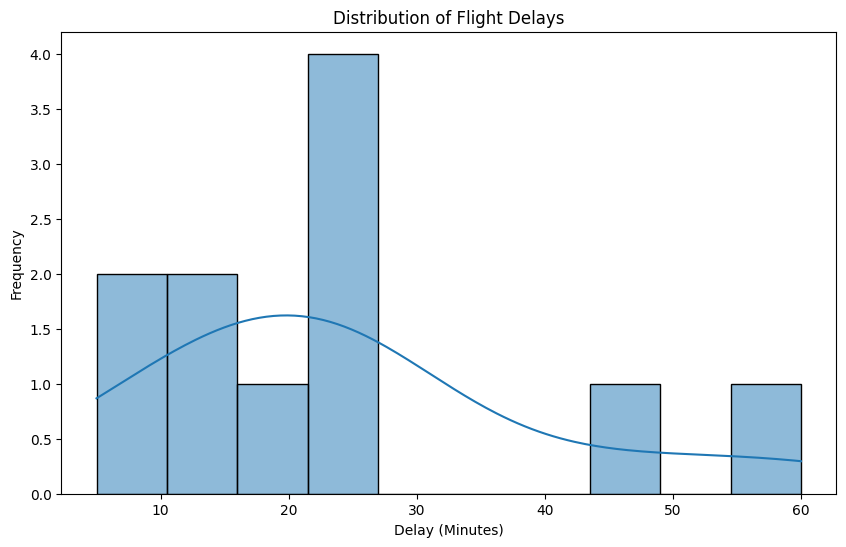

In [24]:

# Plot a histogram for delay minutes
plt.figure(figsize=(10, 6))

sns.histplot(df['DelayMinutes'], bins=10, edgecolor='black', kde = True)
plt.title('Distribution of Flight Delays')
plt.xlabel('Delay (Minutes)')
plt.ylabel('Frequency')
plt.show()




> *From the above histogram, we can see that most of the delay duration lies between 15 to 25 minutes.*



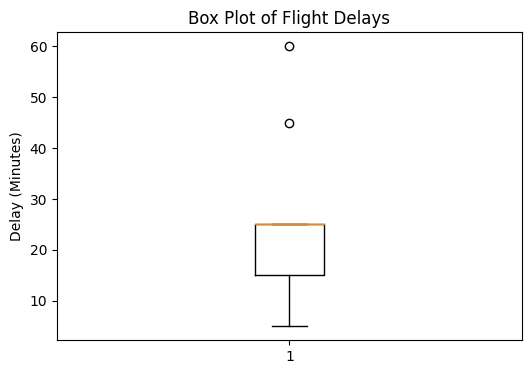

In [36]:
# Box plot for DelayMinutes
plt.figure(figsize=(6, 4))
plt.boxplot(df['DelayMinutes'].dropna(), vert=True)
plt.title('Box Plot of Flight Delays')
plt.ylabel('Delay (Minutes)')
plt.show()




> *From the above box plot, we can see that there are 2 outliers.
Using sql queries, it was identified to be flight no. UA9101  and AA1234.*

```
# select FlightNumber from aviation where DelayMinutes between 40 and 60
```

***



### Average delay by Airlines

In [26]:
# Average delay by airline
airline_delay = df.groupby('Airline')['DelayMinutes'].mean().sort_values(ascending=False)
airline_delay


Airline
American Airlines    30.00
United Airlines      28.75
Delta                16.25
Name: DelayMinutes, dtype: float64


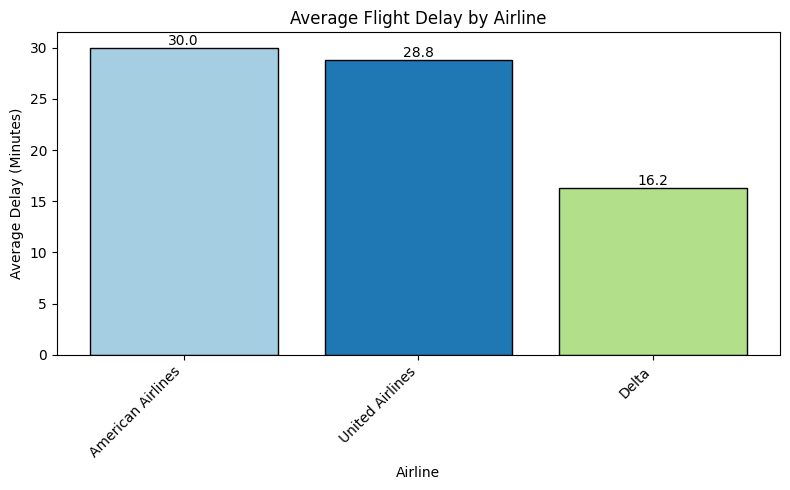

In [44]:

# Define a list of colors (you can modify the colors as needed)
colors = plt.cm.Paired(np.arange(len(airline_delay)))

# Plot the bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(airline_delay.index, airline_delay.values, color=colors, edgecolor='black')

# Add annotations on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}', ha='center', va='bottom')

# Customize the plot
plt.title('Average Flight Delay by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Delay (Minutes)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()





> *From the above graph, we can infer that Airline **Delta** has **least** average delay with 16.25 mins and **American Airlines** has **most** average delay with 30 minutes.*



In [27]:
# Average delay by flight number
flight_delay = df.groupby('FlightNumber')['DelayMinutes'].mean().sort_values(ascending=False)
print(flight_delay)


FlightNumber
AA1234    30.00
UA9101    28.75
DL5678    16.25
Name: DelayMinutes, dtype: float64


*From the above data, we can see that FlightNumber AA1234 has most delay and DL5678 has least delay.*



### Average delay by hour of departure





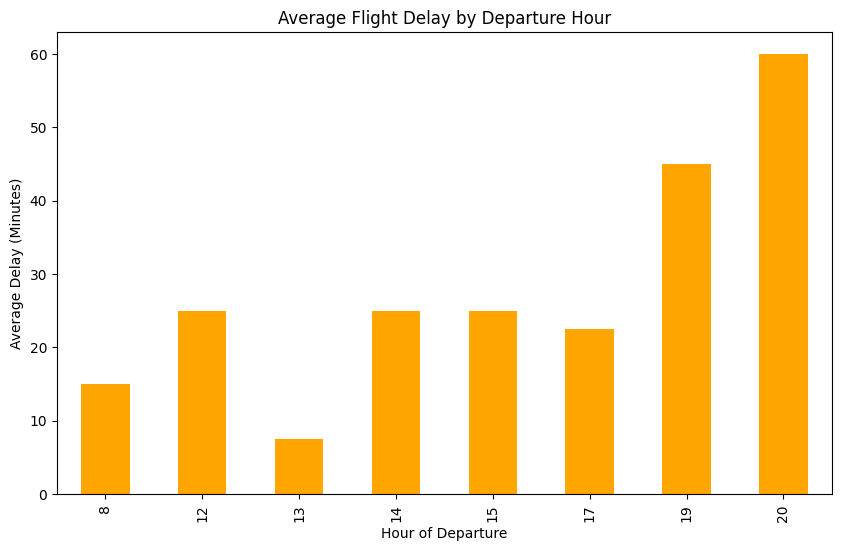

In [52]:
# Extract hour from DepartureTime
df['DepartureHour'] = pd.to_datetime(df['DepartureTime'], format='%H:%M:%S').dt.hour

# Analyze average delay by hour of departure
hourly_delay = df.groupby('DepartureHour')['DelayMinutes'].mean()
hourly_delay

# Plot the average delay by hour
plt.figure(figsize=(10, 6))
hourly_delay.plot(kind='bar', color='orange')
plt.title('Average Flight Delay by Departure Hour')
plt.xlabel('Hour of Departure')
plt.ylabel('Average Delay (Minutes)')
plt.show()


*From the above graph, we can infer that delays increases with increasing hours during the day. Flight operating in the **evening to night are delayed more** than flight operating in the daytime*





In [54]:
df.drop(columns='DepartureHour', inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   FlightNumber    11 non-null     object        
 1   DepartureDate   11 non-null     datetime64[ns]
 2   DepartureTime   11 non-null     object        
 3   ArrivalDate     11 non-null     datetime64[ns]
 4   ArrivalTime     11 non-null     object        
 5   Airline         11 non-null     object        
 6   DelayMinutes    11 non-null     float64       
 7   FlightDuration  11 non-null     float64       
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 832.0+ bytes


## Overall Analysis:

*   American Airlines has most amount of delays.
*   Delays increases during the nightime.

## Suggestions:



1.   American Airlines may be occuring due to technical faults. So **proper maintenance timeline should be followed**.
2.   Delays in the nighttime can be due to insufficient light at nighttime and employees shift ending in the evening. **More sufficient lights should be employed in and around runways** and **More employees** should be made available **at nighttime**.



